In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
%matplotlib inline
import scipy

In [68]:
#mean defects analysis
energy=[500,750,1000,1500,2000]
average_Isites=pd.DataFrame()
std_Isites=pd.DataFrame()
#calculate defects regardless of PKA type
defects=pd.DataFrame()
for e in energy:
    E=str(e)+'ev'
    path='/home/heruhe/Desktop/Ga2o3/cascade/5type/'+E
    os.chdir(path) 
#     print('PKA energy',e)
    average_Isites_pka=np.zeros(5)
    std_Isites_pka=np.zeros(5)
    totalI=[]
    for i in range(5):
        result=pd.read_csv('interstitial_analysis{}.csv'.format(i+1))
        totalI.extend(result['interstitial'].tolist())
        average_Isites_pka[i]=result['interstitial'].mean()
        std_Isites_pka[i]=result['interstitial'].std()/np.sqrt(len(result['interstitial']))
#         print('pka type',i)
#         print('interstitial numbers','mean value:' ,result['interstitial'].mean(),'std value:' ,result['interstitial'].std()/np.sqrt(len(result['interstitial'])))
#         print('fraction:',1-result.iloc[:,3].mean()/result['interstitial'].mean())
#     print('----------------------------------------------------------------')
    average_Isites[e]=average_Isites_pka
    std_Isites[e]=std_Isites_pka
    defects[E]=totalI[:100]
 

In [69]:
#PKA is Ga, calculate defects
defects_Ga=pd.DataFrame()
for e in energy:
    E=str(e)+'ev'
    path='/home/heruhe/Desktop/Ga2o3/cascade/5type/'+E
    os.chdir(path) 
    IGa=[]
    for i in range(2):
        result=pd.read_csv('interstitial_analysis{}.csv'.format(i+1))
        IGa.extend(result['interstitial'].tolist())

    defects_Ga[E]=IGa[:40]

In [70]:
#PKA is O, calculate defects
defects_O=pd.DataFrame()
for e in energy:
    E=str(e)+'ev'
    path='/home/heruhe/Desktop/Ga2o3/cascade/5type/'+E
    os.chdir(path) 
    IO=[]
    for i in [3,4,5]:
        result=pd.read_csv('interstitial_analysis{}.csv'.format(i))
        IO.extend(result['interstitial'].tolist())

    defects_O[E]=IO[:56]

In [5]:
defects

,500ev,750ev,1000ev,1500ev,2000ev
0,8,14,24,33,53
1,11,17,25,42,52
2,10,18,23,48,34
3,13,22,25,35,47
4,7,31,22,40,60
...,...,...,...,...,...
95,7,19,17,17,37
96,13,8,15,27,30
97,8,8,21,19,37
98,6,17,17,33,30


In [6]:
average_Isites=average_Isites.T
average_Isites.columns = ['PKA Ga1', 'PKA Ga2','PKA O1','PKA O2','PKA O3']
std_Isites=std_Isites.T
std_Isites.columns = ['PKA Ga1', 'PKA Ga2','PKA O1','PKA O2','PKA O3']
yerr = std_Isites
print(average_Isites)
print(std_Isites)

        PKA Ga1    PKA Ga2     PKA O1     PKA O2     PKA O3
500    9.600000  12.055556   8.400000   8.789474   8.560000
750   20.500000  18.219512  12.333333  11.851852  13.242424
1000  26.558824  27.205882  16.500000  17.428571  17.060606
1500  39.466667  36.481481  26.892857  26.450000  24.928571
2000  48.857143  53.583333  31.666667  34.777778  34.925926
       PKA Ga1   PKA Ga2    PKA O1    PKA O2    PKA O3
500   0.613732  0.588170  0.513160  0.585292  0.428486
750   1.345955  0.857899  0.865567  0.610226  0.468780
1000  1.226702  1.193252  1.374963  0.617637  0.654153
1500  1.827462  1.480520  0.977714  1.453625  1.480512
2000  2.075120  1.788577  0.873285  2.721922  0.835341


Text(0, 0.5, 'Mean Frenkel pairs')

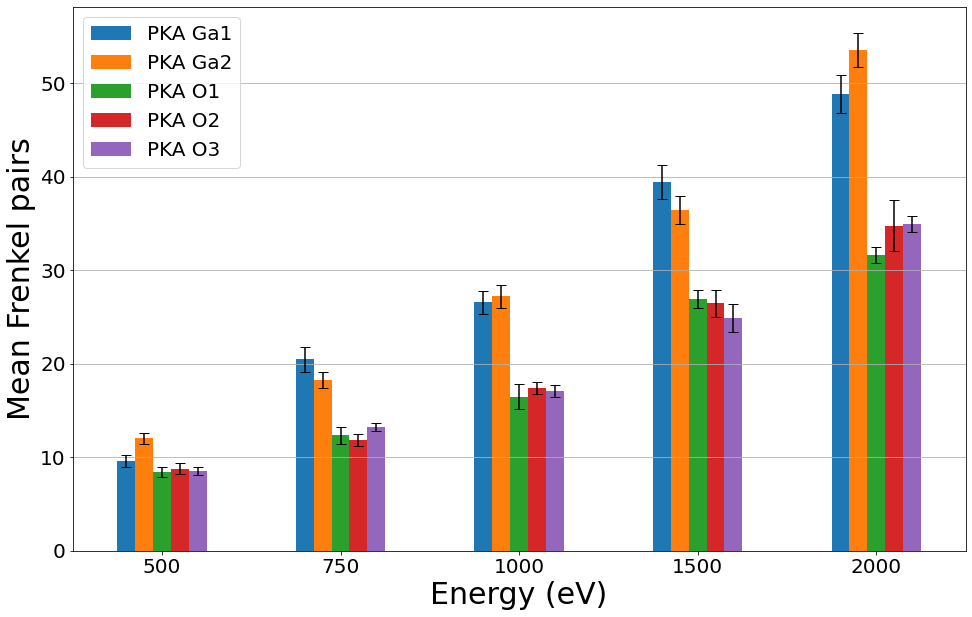

In [7]:
average_Isites.plot(kind='bar', yerr=yerr, rot=0, alpha=1, figsize=(16,10),fontsize=20,capsize=5).grid(axis='y')
plt.legend(fontsize=20,loc='upper left')
plt.xlabel('Energy (eV)',fontsize=30)
plt.ylabel('Mean Frenkel pairs',fontsize=30)
#plt.rcParams["axes.linewidth"] = 3


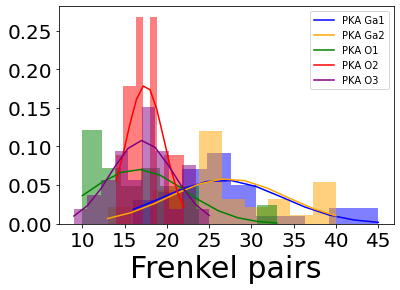

In [8]:
#defects distribution analysis
pka_type= ['PKA Ga1', 'PKA Ga2','PKA O1','PKA O2','PKA O3']
energy=[1000]
average_Isites=pd.DataFrame()
std_Isites=pd.DataFrame()
for e in energy:
    E=str(e)+'ev'
    path='/home/heruhe/Desktop/Ga2o3/cascade/5type/'+E
    os.chdir(path) 
    defect=[]
    colors = ['blue', 'orange' ,'green','red','purple']
    for i in range(5):
        result=pd.read_csv('interstitial_analysis{}.csv'.format(i+1))

        #defect.append(result['interstitial'])
        _, bins, _ = plt.hist(result['interstitial'], 10, density=1, alpha=0.5,color=colors[i])
        mu, sigma = scipy.stats.norm.fit(result['interstitial'])
        best_fit_line = scipy.stats.norm.pdf(bins, mu, sigma)
        plt.plot(bins, best_fit_line,label=pka_type[i],color=colors[i])
    #plt.hist(defect,bins=10,density=True,label=pka_type,histtype='step', fill=False,linewidth=3)
plt.rcParams["figure.figsize"] = (8,5)
plt.xlabel('Frenkel pairs',fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend()



In [66]:
print('O PKA :total defects number: ')
print(defects_O.mean())
print('O PKA :total defects std: ')

print(defects_O.std())
print('Ga PKA :total defects number: ')

print(defects_Ga.mean())
print('Ga PKA :total defects std: ')

print(defects_Ga.std())
print(defects_Ga.head())

O PKA :total defects number: 
500ev      8.500000
750ev     12.142857
1000ev    17.107143
1500ev    26.375000
2000ev    34.107143
dtype: float64
O PKA :total defects std: 
500ev     2.434599
750ev     3.181929
1000ev    4.097354
1500ev    5.751087
2000ev    7.300507
dtype: float64
Ga PKA :total defects number: 
2000ev    49.725
dtype: float64
Ga PKA :total defects std: 
2000ev    10.872189
dtype: float64
   2000ev
0      53
1      52
2      34
3      47
4      60


In [71]:
#use bootstrap sampling to obtain normal distribution of FP numbers:
import numpy as np

import numpy as np

def bootstrap_statistics(data, stat_func=np.mean, n_iterations=1000, conf_level=95,n_samples=100):
    """
    Performs bootstrap sampling to estimate the mean, standard deviation, and confidence interval of a statistic.

    Parameters:
    - data: The input data array.
    - stat_func: The statistic function to apply (e.g., np.mean, np.median). Default is np.mean.
    - n_iterations: The number of bootstrap samples to generate. Default is 1000.
    - conf_level: The confidence level for the interval (between 0 and 100). Default is 95.

    Returns:
    - bootstrap_mean: The mean of the bootstrap statistics.
    - bootstrap_std: The standard deviation of the bootstrap statistics.
    - conf_interval: The confidence interval as a tuple (lower_bound, upper_bound).
    - bootstrap_stats: The list of bootstrap statistics.
    """

    n_size = len(data)
    bootstrap_stats = []

    # Generate bootstrap samples and compute the statistic for each sample
    for i in range(n_iterations):
        sample = np.random.choice(data, size=n_size, replace=True)
        stat = stat_func(sample)
        bootstrap_stats.append(stat)

    # Calculate mean and standard deviation of the bootstrap statistics
    bootstrap_mean = np.mean(bootstrap_stats)
    bootstrap_std = np.std(bootstrap_stats)

    # Calculate confidence interval
    lower_bound = (100 - conf_level) / 2
    upper_bound = 100 - lower_bound
    conf_interval = np.percentile(bootstrap_stats, [lower_bound, upper_bound])
    print(bootstrap_mean,bootstrap_std)
    samples = np.random.normal(loc=bootstrap_mean, scale=bootstrap_std, size=n_samples)
    int_samples = np.round(samples).astype(int)
    return int_samples,conf_interval

# Example usage:
data =defects_Ga['1500ev']
samples,c= bootstrap_statistics(data, stat_func=np.mean, n_iterations=1000, conf_level=95,n_samples=100)



38.757275 1.5456876137742062


In [7]:
#regardless PKA type,analysisi total defects as function of energy
defects_mean=defects.mean()
defects_stde=defects.std()/10
print(defects_mean)
print(defects_stde)

500ev     10.05
750ev     16.69
1000ev    23.69
1500ev    33.28
2000ev    44.96
dtype: float64
500ev     0.343886
750ev     0.606979
1000ev    0.785821
1500ev    0.955693
2000ev    1.341635
dtype: float64


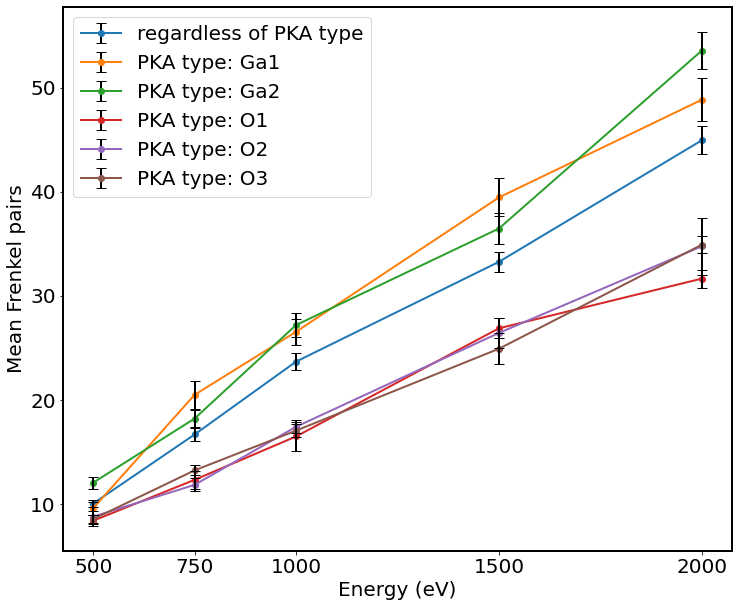

In [10]:
plt.errorbar(energy, defects.mean(),yerr=defects_stde,label='regardless of PKA type',linewidth=2,fmt='-o',capsize=5,ecolor='black', elinewidth=2, barsabove=True)
plt.errorbar(energy, average_Isites['PKA Ga1'],yerr=std_Isites['PKA Ga1'],label='PKA type: Ga1',linewidth=2,fmt='-o',capsize=5,ecolor='black', elinewidth=2, barsabove=True)
plt.errorbar(energy, average_Isites['PKA Ga2'],yerr=std_Isites['PKA Ga2'],label='PKA type: Ga2',linewidth=2,fmt='-o',capsize=5,ecolor='black', elinewidth=2, barsabove=True)
plt.errorbar(energy, average_Isites['PKA O1'],yerr=std_Isites['PKA O1'],label='PKA type: O1',linewidth=2,fmt='-o',capsize=5,ecolor='black', elinewidth=2, barsabove=True)
plt.errorbar(energy, average_Isites['PKA O2'],yerr=std_Isites['PKA O2'],label='PKA type: O2',linewidth=2,fmt='-o',capsize=5,ecolor='black', elinewidth=2, barsabove=True)
plt.errorbar(energy, average_Isites['PKA O3'],yerr=std_Isites['PKA O3'],label='PKA type: O3',linewidth=2,fmt='-o',capsize=5,ecolor='black',  elinewidth=2, barsabove=True)
plt.rcParams["figure.figsize"] = (12,10)
plt.xticks(energy)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.xlabel('Energy (eV)',fontsize=20)
plt.ylabel('Mean Frenkel pairs',fontsize=20)
plt.rcParams["axes.linewidth"] = 2

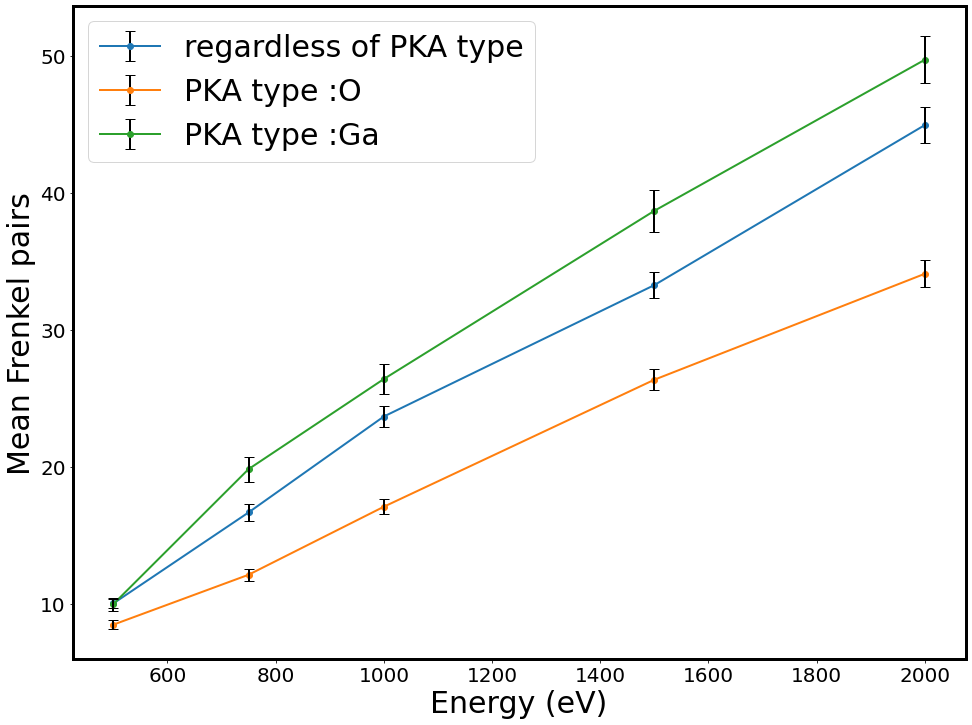

In [13]:
font = {'family' : 'Arial'}
plt.errorbar(energy, defects.mean(),yerr=defects_stde,label='regardless of PKA type',linewidth=2,fmt='-o',capsize=5,ecolor='black',  elinewidth=2, barsabove=True)
plt.errorbar(energy, defects_O.mean(),yerr=defects_O.std()/np.sqrt(len(defects_O)),label='PKA type :O',linewidth=2,fmt='-o',capsize=5,ecolor='black',  elinewidth=2, barsabove=True)
plt.errorbar(energy, defects_Ga.mean(),yerr=defects_Ga.std()/np.sqrt(len(defects_Ga)),label='PKA type :Ga',linewidth=2,fmt='-o',capsize=5,ecolor='black',  elinewidth=2, barsabove=True)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=30)
plt.xlabel('Energy (eV)',fontsize=30)
plt.ylabel('Mean Frenkel pairs',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (16,12)

In [2]:
#cluster analysis
#interstitial clusters
path='/home/heruhe/Desktop/Ga2o3/cascade/5type/2000ev'
os.chdir(path) 
results=pd.read_csv('interstitials_analysis.csv')
results

,frame,interstitial,pka_type,1,2,3,4,5,14,6,...,11,13,35,16,8,10,9,12,20,24
0,1,26,5,25,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,43,4,25,2.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,37,5,27,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,53,1,21,3.0,2.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,30,5,24,3.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,152,35,1,21,3.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,153,46,2,33,1.0,2.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,156,44,5,26,4.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,157,39,5,29,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
average_cluster_results=pd.DataFrame()
error_cluster_results=pd.DataFrame()
pka_type= ['PKA Ga1', 'PKA type: Ga','PKA type: O','PKA O2','PKA O3']
fractions=dict()
for i in range(5):
    pka=i+1
    clusters=results[results['pka_type']==pka]
    fraction=1-clusters.iloc[:, 4:].sum(axis=1)/ clusters['interstitial']
    fractions[pka_type[i]]=fraction
    
    average_clusters=clusters.mean()
    average_clusters=average_clusters.iloc[3:]
    error_clusters=clusters.std()/np.sqrt(len(clusters['pka_type']))
    error_clusters=error_clusters.iloc[3:]
    average_clusters.index = average_clusters.index.astype(int)
    error_clusters.index = error_clusters.index.astype(int)
    average_clusters=average_clusters.sort_index()
    error_clusters=error_clusters.sort_index()
    average_cluster_results[pka_type[i]]=average_clusters
    error_cluster_results[pka_type[i]]=error_clusters*1.96
average_cluster_results


,PKA Ga1,PKA type: Ga,PKA type: O,PKA O2,PKA O3
1,25.714286,26.861111,24.833333,25.277778,26.444444
2,4.071429,4.361111,1.916667,1.777778,2.148148
3,1.392857,1.555556,0.666667,0.500000,0.629630
4,0.535714,0.722222,0.000000,0.333333,0.296296
5,0.321429,0.472222,0.000000,0.222222,0.111111
6,0.214286,0.277778,0.083333,0.111111,0.037037
7,0.178571,0.083333,0.000000,0.055556,0.000000
8,0.035714,0.111111,0.000000,0.000000,0.000000
9,0.071429,0.055556,0.000000,0.000000,0.000000
10,0.000000,0.027778,0.000000,0.000000,0.000000


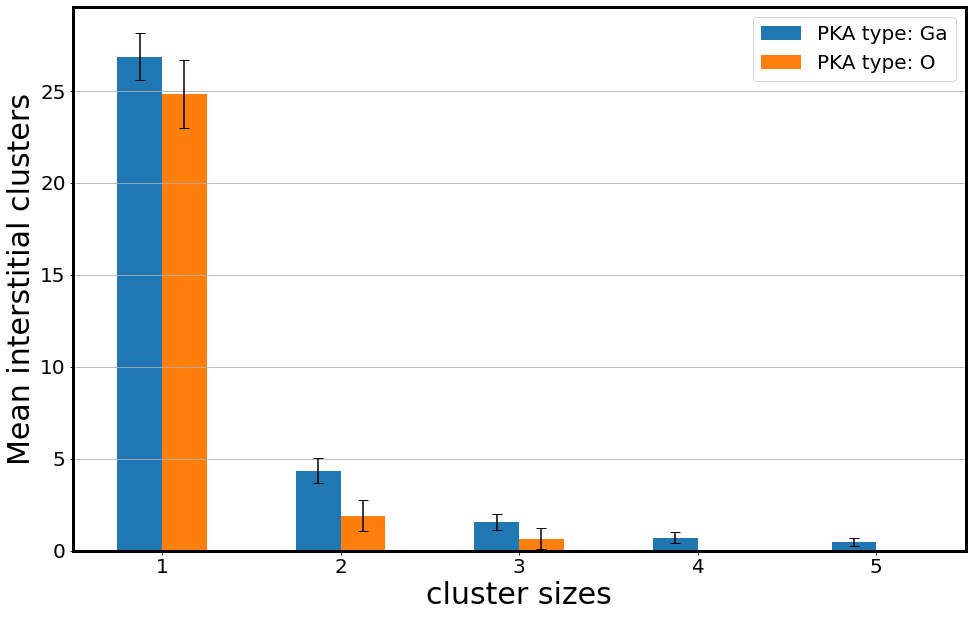

In [9]:
average_cluster_results.iloc[0:5,1:3].plot(kind='bar', yerr=error_cluster_results.iloc[0:5,1:3], rot=0, alpha=1, figsize=(16,10),fontsize=20,capsize=5).grid(axis='y')
plt.legend(fontsize=20)
plt.xlabel('cluster sizes',fontsize=30)
plt.ylabel('Mean interstitial clusters',fontsize=30)
plt.rcParams["axes.linewidth"] = 3
plt.rcParams["figure.figsize"] = (16,12)
font = {'family' : 'Arial'}
#plt.yscale("log")

In [2]:
#cluster analysis
#vacancy clusters
path='/home/heruhe/Desktop/Ga2o3/cascade/5type/2000ev'
os.chdir(path) 
results=pd.read_csv('vacancy_analysis.csv')
results

,frame,interstitial,pka_type,1,2,3,6,4,14,5,7,12,8,10,16,11
0,1,26,5,18,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,43,4,22,3,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,37,5,14,6,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,53,1,25,4,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,30,5,13,5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,152,35,1,15,4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
117,153,46,2,25,6,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,156,44,5,21,2,2.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
119,157,39,5,21,4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
average_cluster_results=pd.DataFrame()
error_cluster_results=pd.DataFrame()
pka_type= ['PKA Ga1', 'PKA type: Ga','PKA type: O','PKA O2','PKA O3']
for i in range(5):
    pka=i+1
    clusters=results[results['pka_type']==pka]
    average_clusters=clusters.mean()
    average_clusters=average_clusters.iloc[3:]
    error_clusters=clusters.std()/np.sqrt(len(clusters['pka_type']))
    error_clusters=error_clusters.iloc[3:]
    average_clusters.index = average_clusters.index.astype(int)
    error_clusters.index = error_clusters.index.astype(int)
    average_clusters=average_clusters.sort_index()
    error_clusters=error_clusters.sort_index()
    average_cluster_results[pka_type[i]]=average_clusters
    error_cluster_results[pka_type[i]]=error_clusters*1.96
average_cluster_results


,PKA Ga1,PKA type: Ga,PKA type: O,PKA O2,PKA O3
1,26.714286,30.111111,16.416667,19.611111,18.000000
2,4.178571,5.611111,4.000000,3.777778,4.148148
3,1.607143,1.666667,1.583333,1.333333,1.296296
4,0.607143,0.972222,0.416667,0.444444,0.629630
5,0.464286,0.305556,0.166667,0.166667,0.296296
6,0.178571,0.027778,0.000000,0.166667,0.074074
7,0.071429,0.111111,0.000000,0.000000,0.000000
8,0.000000,0.055556,0.000000,0.000000,0.037037
10,0.035714,0.000000,0.000000,0.000000,0.000000
11,0.071429,0.000000,0.000000,0.000000,0.000000


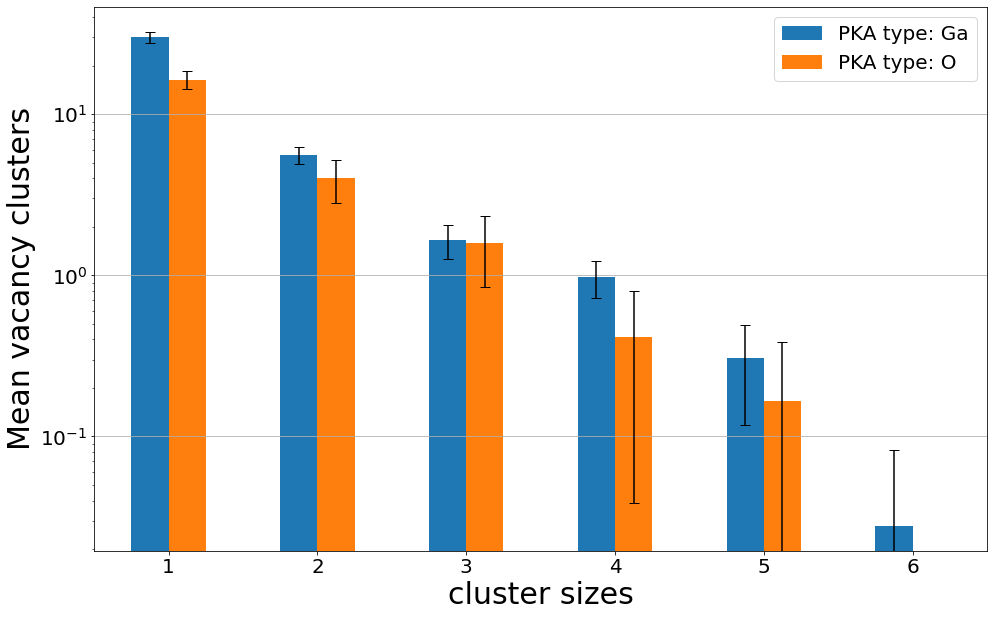

In [5]:
average_cluster_results.iloc[0:6,1:3].plot(kind='bar', yerr=error_cluster_results.iloc[0:6,1:3], rot=0, alpha=1, figsize=(16,10),fontsize=20,capsize=5).grid(axis='y')
plt.legend(fontsize=20)
plt.xlabel('cluster sizes',fontsize=30)
plt.ylabel('Mean vacancy clusters',fontsize=30)
plt.yscale("log")

In [6]:
#calculate culstering efficiency:interstitials

energy=[500,750,1000,1500,2000]
mean_frac=pd.DataFrame()
err_frac=pd.DataFrame()
for e in energy:
    E=str(e)+'ev'
    path='/home/heruhe/Desktop/Ga2o3/cascade/5type/'+E
    os.chdir(path) 
#     print('PKA energy',e)
    average_frac=np.zeros(5)
    error_frac=np.zeros(5)
    for i in range(5):
        df=pd.read_csv('interstitials_analysis{}.csv'.format(i+1))
        frac=1-df.iloc[:, 3]/ df['interstitial']
        
        average_frac[i]=frac.mean()
        print(average_frac[i])
        error_frac[i]=frac.std()/np.sqrt(len(frac))
#         print('pka type',i)
#         print('interstitial numbers','mean value:',average_frac[i])
#          print('fraction:',error_frac[i])
#     print('----------------------------------------------------------------')

    mean_frac[e]=average_frac
    err_frac[e]=error_frac


0.19118842268842268
0.34196884270413674
0.15098701298701298
0.13824684087841982
0.17873304473304472
0.4381703001067591
0.38413643171640005
0.1579534681005269
0.1606658755824562
0.20007860034598002
0.46159408522504064
0.4625331551922712
0.22860162766021563
0.2640341742757709
0.2009452456782331
0.46878336967446504
0.4768715117015361
0.2193010105233198
0.24341442065619598
0.18630799893907854
0.4637563427462914
0.4868686391297271
0.2095915408882815
0.258364616744572
0.23792294237127032


             0         1         2         3         4
500   0.191188  0.341969  0.150987  0.138247  0.178733
750   0.438170  0.384136  0.157953  0.160666  0.200079
1000  0.461594  0.462533  0.228602  0.264034  0.200945
1500  0.468783  0.476872  0.219301  0.243414  0.186308
2000  0.463756  0.486869  0.209592  0.258365  0.237923
       PKA Ga1  PKA type: Ga  PKA type: O    PKA O2    PKA O3
500   0.191188      0.341969     0.150987  0.138247  0.178733
750   0.438170      0.384136     0.157953  0.160666  0.200079
1000  0.461594      0.462533     0.228602  0.264034  0.200945
1500  0.468783      0.476872     0.219301  0.243414  0.186308
2000  0.463756      0.486869     0.209592  0.258365  0.237923
       PKA Ga1  PKA type: Ga  PKA type: O    PKA O2    PKA O3
500   0.051283      0.040047     0.036652  0.041217  0.035064
750   0.040382      0.026904     0.043280  0.025060  0.026173
1000  0.029269      0.030131     0.039100  0.032334  0.023990
1500  0.027725      0.026475     0.021267  0.03545

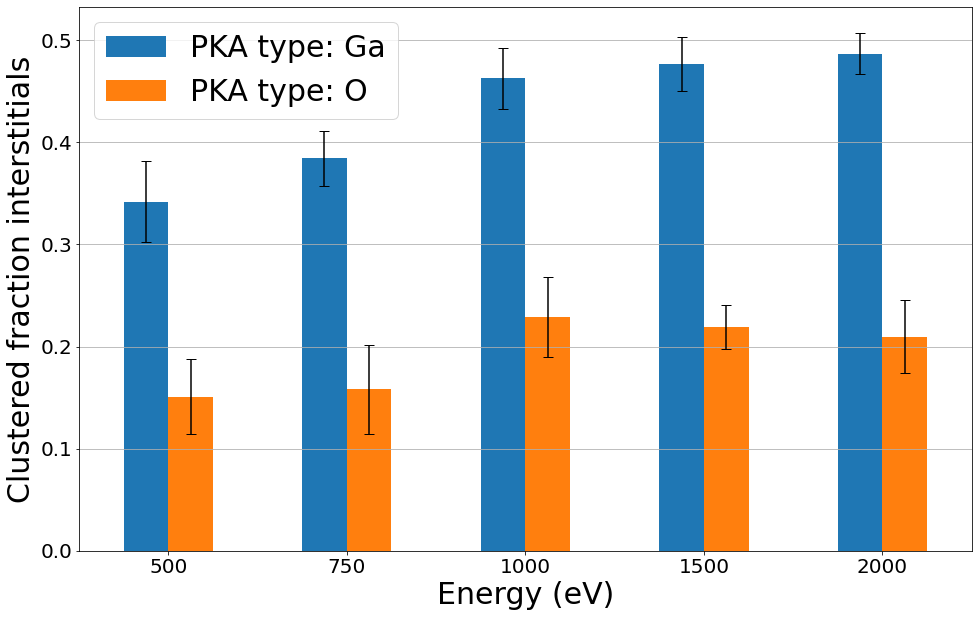

In [7]:
mean_frac=mean_frac.T
print(mean_frac)
mean_frac.columns = ['PKA Ga1', 'PKA type: Ga','PKA type: O','PKA O2','PKA O3']
err_frac=err_frac.T
err_frac.columns =['PKA Ga1', 'PKA type: Ga','PKA type: O','PKA O2','PKA O3']
print(mean_frac)
print(err_frac)
mean_frac.iloc[0:5,1:3].plot(kind='bar', yerr=err_frac.iloc[0:5,1:3], rot=0, alpha=1, figsize=(16,10),fontsize=20,capsize=5).grid(axis='y')
plt.legend(fontsize=30)
plt.xlabel('Energy (eV)',fontsize=30)
plt.ylabel('Clustered fraction interstitials',fontsize=30)
plt.rcParams["figure.figsize"] = (16,12)

In [14]:
#calculate culstering efficiency:vacancies
energy=[500,750,1000,1500,2000]
mean_frac=pd.DataFrame()
err_frac=pd.DataFrame()
for e in energy:
    E=str(e)+'ev'
    path='/home/heruhe/Desktop/Ga2o3/cascade/5type/'+E
    os.chdir(path) 
#     print('PKA energy',e)
    average_frac=np.zeros(5)
    error_frac=np.zeros(5)
    for i in range(5):
        df=pd.read_csv('vacancy_analysis{}.csv'.format(i+1))
        frac=1-df.iloc[:, 3]/ df['interstitial']
        average_frac[i]=frac.mean()
        error_frac[i]=frac.std()/np.sqrt(len(frac))
#         print('pka type',i)
#         print('interstitial numbers','mean value:',average_frac[i])
#          print('fraction:',error_frac[i])
#     print('----------------------------------------------------------------')

    mean_frac[e]=average_frac
    err_frac[e]=error_frac


             0         1         2         3         4
500   0.538352  0.474497  0.360428  0.388137  0.412162
750   0.520007  0.508298  0.389385  0.390769  0.536948
1000  0.428890  0.528542  0.451760  0.452472  0.481334
1500  0.524440  0.443735  0.444187  0.416139  0.499065
2000  0.457115  0.436911  0.476463  0.435189  0.484326
       PKA Ga1  PKA type: Ga  PKA type: O    PKA O2    PKA O3
500   0.538352      0.474497     0.360428  0.388137  0.412162
750   0.520007      0.508298     0.389385  0.390769  0.536948
1000  0.428890      0.528542     0.451760  0.452472  0.481334
1500  0.524440      0.443735     0.444187  0.416139  0.499065
2000  0.457115      0.436911     0.476463  0.435189  0.484326
       PKA Ga1  PKA type: Ga  PKA type: O    PKA O2    PKA O3
500   0.046021      0.031140     0.045188  0.058802  0.051113
750   0.032008      0.023564     0.048605  0.037240  0.026724
1000  0.022512      0.018681     0.038866  0.024974  0.029484
1500  0.021479      0.024549     0.029401  0.03150

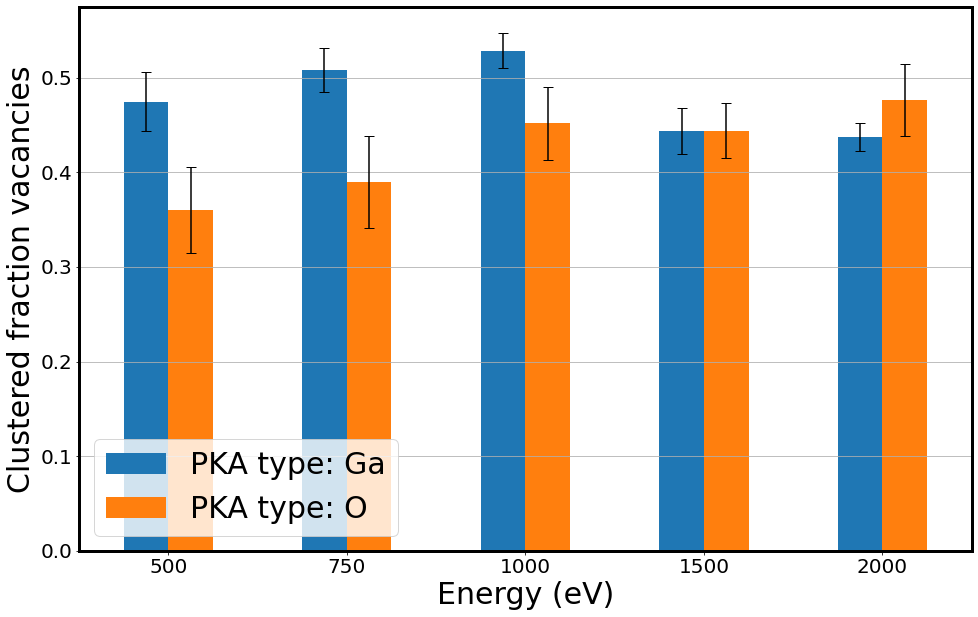

In [15]:
mean_frac=mean_frac.T
print(mean_frac)
mean_frac.columns = ['PKA Ga1', 'PKA type: Ga','PKA type: O','PKA O2','PKA O3']
err_frac=err_frac.T
err_frac.columns =['PKA Ga1', 'PKA type: Ga','PKA type: O','PKA O2','PKA O3']
print(mean_frac)
print(err_frac)
mean_frac.iloc[0:5,1:3].plot(kind='bar', yerr=err_frac.iloc[0:5,1:3], rot=0, alpha=1, figsize=(16,10),fontsize=20,capsize=5).grid(axis='y')
plt.legend(fontsize=30)
plt.xlabel('Energy (eV)',fontsize=30)
plt.ylabel('Clustered fraction vacancies',fontsize=30)
plt.rcParams["figure.figsize"] = (16,12)
plt.rcParams["axes.linewidth"] = 3

In [88]:
import os
import numpy as np
import pandas as pd

def vacancy_statis(path):
    

    
    os.chdir(path) 

    cascades = []

    for i in range(0,150):
        try:
        
            df = pd.read_csv('Vacancy_position{}.csv'.format(i))
            cascade = np.zeros(3)
            # Counting vacancy positions
            vo = len(df[df['Particle Type'] > 2])
            vga = len(df[df['Particle Type'] < 3])
            # Storing data in cascade array
            cascade[0] = df['pka_type'][0]  # Assuming you want to store the first value of 'pka_type'
            cascade[1] = vo
            cascade[2] = vga
        
            cascades.append(cascade)
        except:
            continue
    
        
    # Converting list of arrays to DataFrame
    df = pd.DataFrame(cascades, columns=['pka_type', 'vo', 'vga'])
    dfo=df[df['pka_type']>2]
    
    dfga=df[df['pka_type']<3]
    #plt.hist(dfo['vo'],bins=20,label='O vancany, PKA:O')
    #plt.hist(dfo['vga'],bins=20)
    #print(dfga['vga'][:30],dfga['vga'][30:])
    #plt.legend()
    avarage_o=dfo.mean()
    avarage_ga=dfga.mean()
    std_err_o=dfo.std()/np.sqrt(len(dfo))
    print(dfo.std())
    std_err_ga=dfga.std()/np.sqrt(len(dfga))
    print(std_err_ga,len(dfo),len(dfga),len(dfo)+len(dfga))
    return avarage_o,avarage_ga,std_err_o,std_err_ga

In [89]:
energy=[500,750,1000,1500,2000]
for i in energy:
    path='/home/heruhe/Desktop/Ga2o3/cascade/5type/{}ev'.format(i)
    print(i)
    n_vo,n_vga,std_e_o,std_e_ga=vacancy_statis(path)
    #print(vacancy_statis(path))

500
pka_type    0.857493
vo          1.430844
vga         2.133343
dtype: float64
pka_type    0.063492
vo          0.173904
vga         0.408171
dtype: float64 69 61 130
750
pka_type    0.768290
vo          1.711119
vga         2.954490
dtype: float64
pka_type    0.060451
vo          0.201948
vga         0.716771
dtype: float64 75 64 139
1000
pka_type    0.858579
vo          1.948377
vga         4.099913
dtype: float64
pka_type    0.063492
vo          0.213321
vga         0.791015
dtype: float64 61 63 124
1500
pka_type    0.797935
vo          2.099835
vga         6.001432
dtype: float64
pka_type    0.071429
vo          0.310932
vga         1.326171
dtype: float64 62 49 111
2000
pka_type    0.793052
vo          2.386560
vga         7.496960
dtype: float64
pka_type    0.063843
vo          0.336711
vga         1.473764
dtype: float64 54 61 115


In [84]:
2.3865/np.sqrt(54)

0.32476151506400297